### X-Wines: A wine dataset for recommender systems and machine learning 
#### Rogério Xavier de Azambuja (rogerio.xavier@farroupilha.ifrs.edu.br)
#### Dataset X-Wines from https://github.com/rogerioxavier/X-Wines

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

# Opening required packages to show output
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt

# Display basic configs
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 100) # default= None
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', None)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Opening X-Wines dataset
wines   = pd.read_csv("XWines_100K.csv", low_memory=False, encoding="utf-8", memory_map=True)
ratings = pd.read_csv("XWines_ratings_21M.csv", low_memory=False, encoding="utf-8", memory_map=True)
len(wines), len(ratings)

(100646, 21013536)

In [3]:
print("Total wines:", wines.WineID.nunique(), "from", wines.Code.nunique() ,"different countries")
print("Total users:", ratings.UserID.nunique(), "who rated the wines")
print(f"             in the period between {ratings.Date.min()} and {ratings.Date.max()}")
print("Total ratings:", len(ratings), f"5-stars on wine vintages since {ratings.Vintage.min()}, including non-vintage 'N.V.'")

Total wines: 100646 from 62 different countries
Total users: 1056079 who rated the wines
             in the period between 2012-01-03 08:20:53 and 2021-12-31 23:59:56
Total ratings: 21013536 5-stars on wine vintages since 1950, including non-vintage 'N.V.'


In [4]:
# Wines x Ratings View
w = ratings.groupby('WineID', as_index=False)[['Rating']].count()
u = ratings.groupby('UserID', as_index=False)[['Rating']].count()
print("Ratings:", len(ratings), "   Wines: ", len(w), "  Min.:", w.Rating.min(), " Max.:", w.Rating.max())
print("                 ","   Users:", len(u), "  Min.:", u.Rating.min(), " Max.:", u.Rating.max())

Ratings: 21013536    Wines:  100646   Min.: 5  Max.: 27415
                     Users: 1056079   Min.: 5  Max.: 2986


In [5]:
# Wines X Ratings relationship verification
len(ratings.WineID.unique()), len(wines.WineID.unique())

(100646, 100646)

In [6]:
wines.WineID.unique().sort() == ratings.WineID.unique().sort()

True

In [7]:
wines.info(), wines.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100646 entries, 0 to 100645
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   WineID      100646 non-null  int64  
 1   WineName    100646 non-null  object 
 2   Type        100646 non-null  object 
 3   Elaborate   100646 non-null  object 
 4   Grapes      100646 non-null  object 
 5   ABV         100646 non-null  float64
 6   Body        100646 non-null  object 
 7   Acidity     100646 non-null  object 
 8   Harmonize   100646 non-null  object 
 9   Vintages    100646 non-null  object 
 10  Code        100646 non-null  object 
 11  Country     100646 non-null  object 
 12  RegionID    100646 non-null  int64  
 13  RegionName  100646 non-null  object 
 14  WineryID    100646 non-null  int64  
 15  WineryName  100646 non-null  object 
 16  Website     82679 non-null   object 
dtypes: float64(1), int64(3), object(13)
memory usage: 13.1+ MB


(None,
 WineID            0
 WineName          0
 Type              0
 Elaborate         0
 Grapes            0
 ABV               0
 Body              0
 Acidity           0
 Harmonize         0
 Vintages          0
 Code              0
 Country           0
 RegionID          0
 RegionName        0
 WineryID          0
 WineryName        0
 Website       17967
 dtype: int64)

In [8]:
ratings.info(), ratings.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013536 entries, 0 to 21013535
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   RatingID  int64  
 1   WineID    int64  
 2   Vintage   object 
 3   Rating    float64
 4   UserID    int64  
 5   Date      object 
dtypes: float64(1), int64(3), object(2)
memory usage: 961.9+ MB


(None,
 RatingID    0
 WineID      0
 Vintage     0
 Rating      0
 UserID      0
 Date        0
 dtype: int64)

In [9]:
wines.Type.value_counts()

Red             56193
White           29196
Sparkling        7357
Rosé             4392
Dessert          2396
Dessert/Port     1112
Name: Type, dtype: int64

In [10]:
wines.Body.value_counts()

Full-bodied          43876
Medium-bodied        34401
Very full-bodied     10882
Light-bodied         10032
Very light-bodied     1455
Name: Body, dtype: int64

In [11]:
wines.Acidity.value_counts()

High      79410
Medium    17827
Low        3409
Name: Acidity, dtype: int64

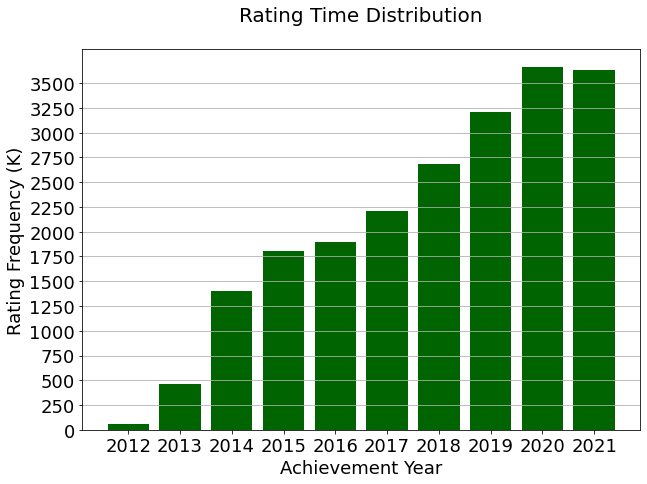

In [12]:
Years = ratings.Date.apply(lambda x: int(x[:4]))
plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 18})
plt.title("Rating Time Distribution\n", fontsize=20)
plt.bar(Years.value_counts().index, Years.value_counts().values, color='DarkGreen')
plt.xlabel('Achievement Year')
plt.ylabel('Rating Frequency (K)')
plt.yticks(np.arange(0, 3750000, step=250000), np.arange(0, 3750, step=250))
plt.xticks(Years.unique())
plt.grid(visible=True, rasterized=True, axis='y')
plt.show()

In [13]:
Years.value_counts()

2020    3658529
2021    3634178
2019    3207094
2018    2682560
2017    2204047
2016    1900597
2015    1805355
2014    1403015
2013     464462
2012      53699
Name: Date, dtype: int64

In [14]:
ratings.Vintage.value_counts().sort_index()

1950        171
1951         30
1952        164
1953        343
1954         55
1955        302
1956         62
1957        267
1958        272
1959       1861
1960        615
1961       1720
1962        755
1963        920
1964       1918
1965        725
1966       1868
1967       1480
1968       1684
1969       1208
1970       3936
1971       2358
1972        985
1973       1829
1974       1888
1975       4036
1976       2711
1977       2065
1978       3955
1979       3788
1980       6740
1981       5323
1982      10516
1983       7278
1984       2536
1985      10736
1986       8573
1987       4534
1988      11085
1989      14526
1990      21325
1991       8104
1992       6809
1993      10345
1994      15500
1995      27391
1996      32075
1997      27724
1998      41538
1999      46687
2000      68915
2001      72168
2002      55535
2003      74514
2004     126796
2005     174508
2006     210296
2007     280456
2008     457880
2009     569319
2010     832024
2011    1149849
2012    

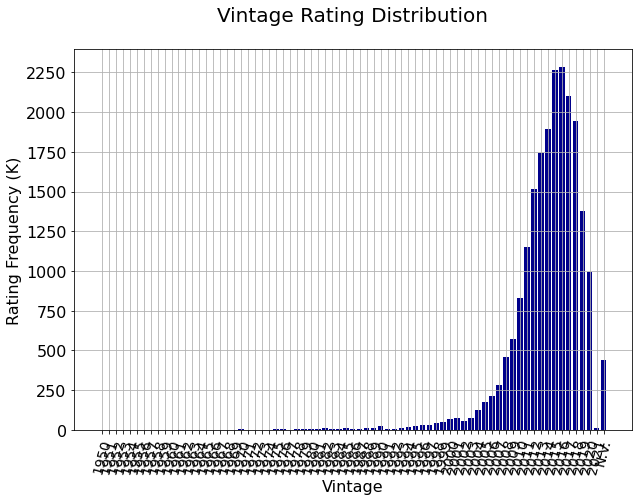

In [15]:
plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 16})
plt.title("Vintage Rating Distribution\n", fontsize=20)
plt.grid(True)
plt.bar(ratings.Vintage.value_counts().sort_index().index, ratings.Vintage.value_counts().sort_index().values, color='DarkBlue' )
plt.xlabel('Vintage')
plt.ylabel('Rating Frequency (K)')
plt.yticks(np.arange(0, 2500000, step=250000), np.arange(0, 2500, step=250))
plt.xticks(rotation=75, fontsize=14)
plt.show()

In [16]:
ratings.Rating.value_counts().sort_index(ascending=False)

5.0    2950264
4.5    2505818
4.0    8301655
3.5    3389567
3.0    2755661
2.5     468045
2.0     425593
1.5      64481
1.0     152452
Name: Rating, dtype: int64

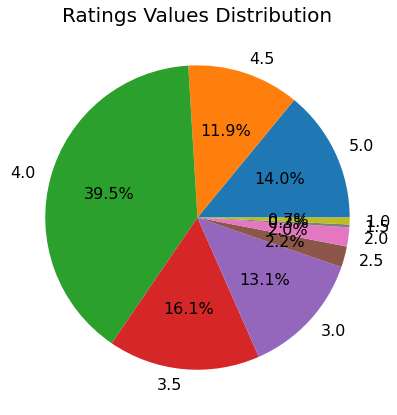

In [17]:
temp = ratings.groupby('Rating', as_index=False)[['UserID']].count().sort_values(by=['Rating'], ascending=False)
temp['freq'] = temp['UserID'] / len(ratings['Rating'])
plt.figure(figsize=(10,7))
plt.pie(temp['freq'], labels= temp['Rating'], autopct='%1.1f%%')
plt.title("Ratings Values Distribution", fontsize=20)
plt.show()

In [18]:
wines.Country.value_counts().sort_index()

Albania                       1
Argentina                  3603
Armenia                      10
Australia                  4818
Austria                    2146
Azerbaijan                    5
Belgium                      17
Bolivia                       9
Bosnia and Herzegovina        1
Brazil                     1539
Bulgaria                    212
Canada                      840
Chile                      4615
China                         9
Colombia                      1
Croatia                     144
Cyprus                       11
Czech Republic              208
Denmark                       5
France                    24399
Georgia                     236
Germany                    4834
Greece                      497
Hungary                     302
India                        18
Israel                      244
Italy                     19358
Japan                        51
Jordan                        1
Lebanon                      67
Liechtenstein                 1
Luxembou

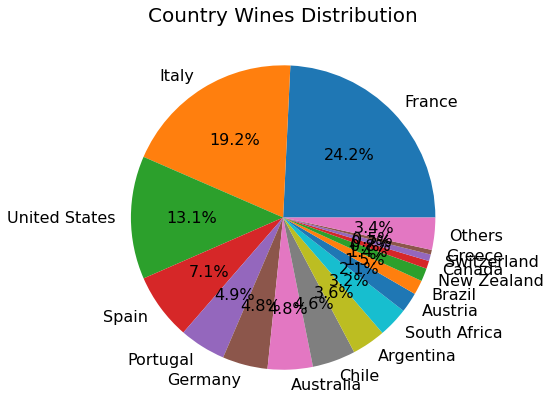

In [19]:
temp = wines.groupby('Country', as_index=False)[['WineID']].count().sort_values(by=['WineID'], ascending=False)
temp_major = temp.loc[temp.WineID > 400]
temp_major = temp_major.append(pd.DataFrame(data=[{"Country": "Others", "WineID": temp.loc[temp.WineID<=400]['WineID'].sum()}]))
temp_major['freq'] = temp_major['WineID'] / len(wines)
plt.figure(figsize=(10,7))
plt.pie(temp_major['freq'], labels= temp_major['Country'], autopct='%1.1f%%' )
plt.title("Country Wines Distribution", fontsize=20)
plt.show()

In [20]:
ratings.groupby('UserID', as_index=False)[['Rating']].count().sort_values(['Rating'], ascending=False)

,UserID,Rating
83917,1084433,2986
34804,1034989,2979
70465,1070878,2613
48000,1048267,2597
159488,1160536,2392
...,...,...
972387,1979157,5
96219,1096801,5
534326,1537952,5
820872,1826553,5


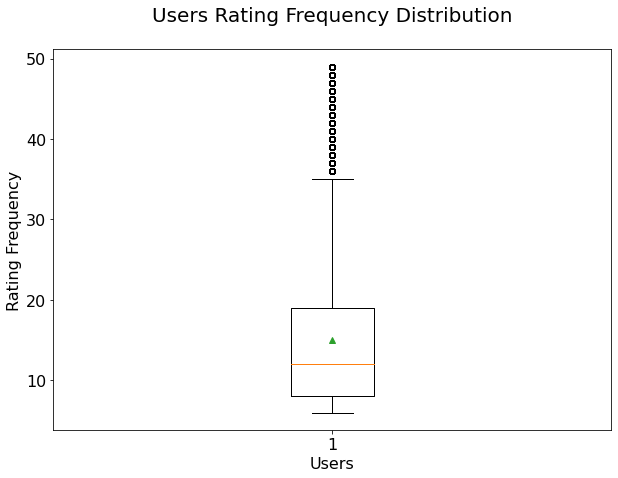

# Users interval (5-50): 907964


In [21]:
temp = ratings.UserID.value_counts().values
temp = temp [temp > 5]
temp = temp [temp < 50] # optional filter
plt.figure(figsize=(10,7))
plt.boxplot(temp, showmeans=True, autorange=True)
plt.xlabel('Users')
plt.ylabel('Rating Frequency')
plt.title("Users Rating Frequency Distribution\n", fontsize=20)
plt.show()
print("# Users interval (5-50):", len(temp))

In [22]:
ratings.groupby('WineID', as_index=False)[['Rating']].count().sort_values(['Rating'], ascending=False)

,WineID,Rating
55209,155289,27415
78899,179010,23626
78900,179011,21216
11369,111391,20913
67312,167418,20817
...,...,...
91569,191683,5
91568,191682,5
91567,191681,5
91566,191680,5


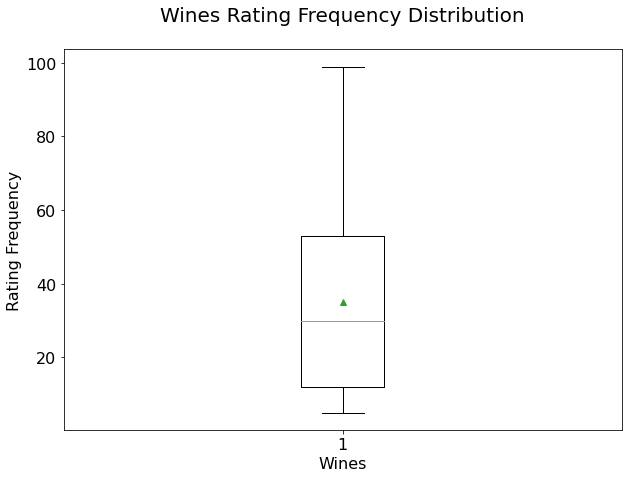

# Wines interval (0-100): 62435


In [23]:
temp = ratings.WineID.value_counts().values
temp = temp [temp > 0]
temp = temp [temp < 100] # optional filter
plt.figure(figsize=(10,7))
plt.boxplot(temp, showmeans=True, autorange=True)
plt.xlabel('Wines')
plt.ylabel('Rating Frequency')
plt.title("Wines Rating Frequency Distribution\n", fontsize=20)
plt.show()
print("# Wines interval (0-100):", len(temp))

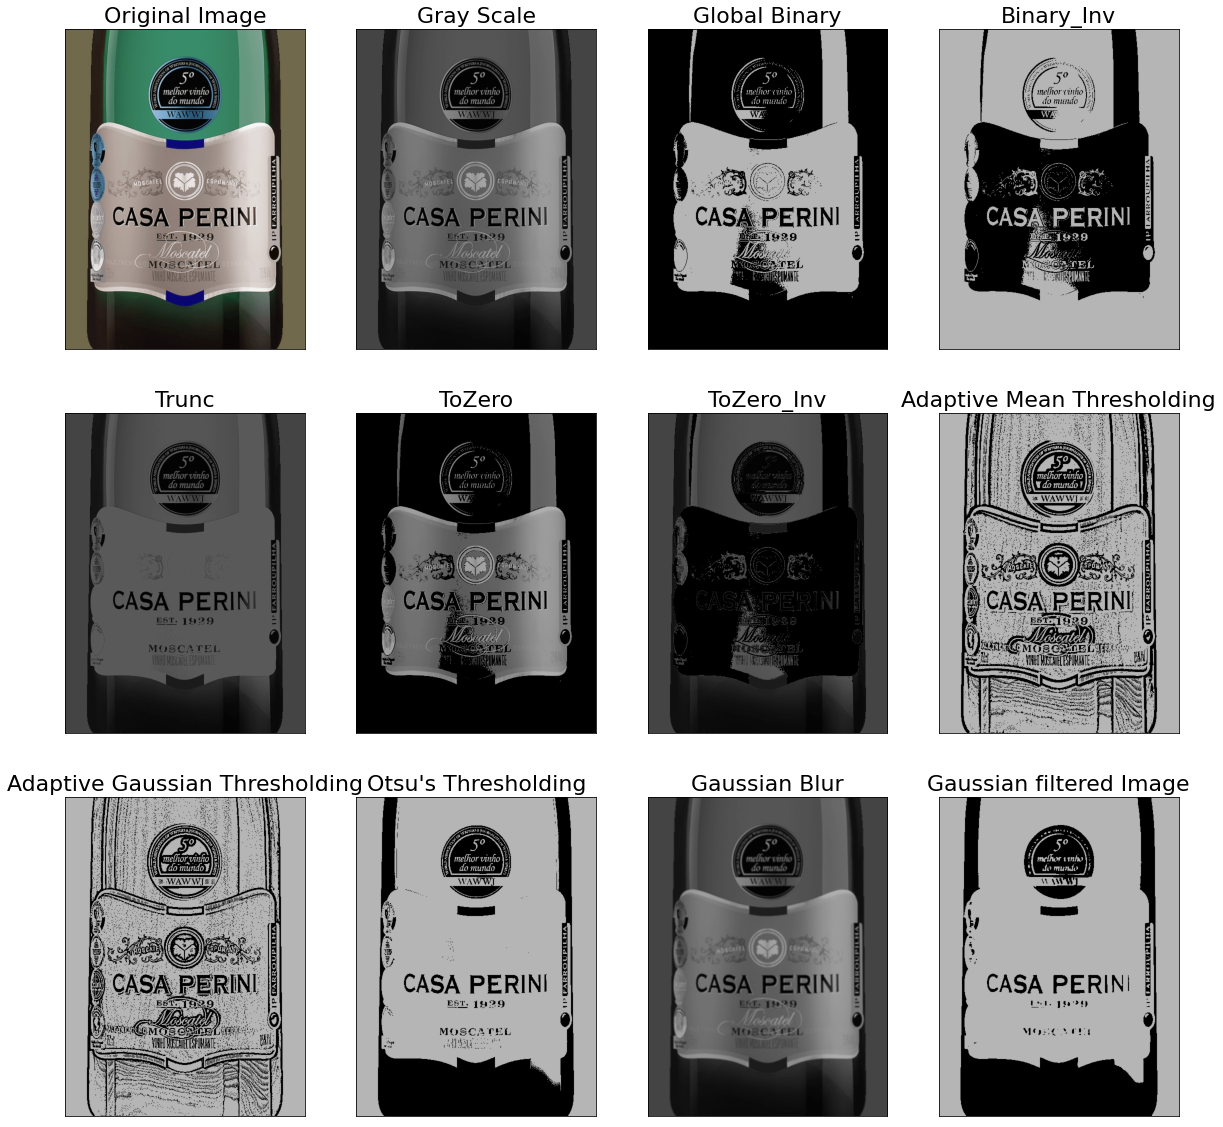

In [24]:
# image calibration effects for OCR algorithms
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

imgRGB  = cv.imread("images/100001.jpeg",1)
imgGray = cv.imread("images/100001.jpeg",0)
ret1,thresh1 = cv.threshold(imgGray,127,255,cv.THRESH_BINARY)
ret2,thresh2 = cv.threshold(imgGray,127,255,cv.THRESH_BINARY_INV)
ret3,thresh3 = cv.threshold(imgGray,127,255,cv.THRESH_TRUNC)
ret4,thresh4 = cv.threshold(imgGray,127,255,cv.THRESH_TOZERO)
ret5,thresh5 = cv.threshold(imgGray,127,255,cv.THRESH_TOZERO_INV)

#ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
thresh6 = cv.adaptiveThreshold(imgGray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
thresh7 = cv.adaptiveThreshold(imgGray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

# Otsu's thresholding
ret8,thresh8 = cv.threshold(imgGray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(imgGray,(5,5),0)
ret9,thresh9 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

titles = ['Original Image','Gray Scale','Global Binary','Binary_Inv','Trunc','ToZero','ToZero_Inv', \
          'Adaptive Mean Thresholding','Adaptive Gaussian Thresholding', "Otsu's Thresholding", \
          'Gaussian Blur', 'Gaussian filtered Image']
images = [imgRGB,imgGray,thresh1,thresh2,thresh3,thresh4,thresh5,thresh6,thresh7,thresh8,blur,thresh9]

plt.figure(figsize=(20, 20))
for i in range(12):
    plt.subplot(3,4,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=360)
    plt.title(titles[i], fontsize=22)
    plt.xticks([]),plt.yticks([])
plt.show()

In [25]:
import cv2
# Image verification
countImageProblem = 0
for wineID in tqdm(zip(wines.WineID), total=wines.shape[0]):
    try:
        img = cv2.imread(f"images/{wineID[0]}.jpeg")
        width, height = int(img.shape[1]), int(img.shape[0])
        if width != 480 or height != 640:
            print(f"Resize the file {wineID[0]}.jpeg", width, height)
            countImageProblem +=1
    except:
        print(f"File {wineID[0]}.jpeg don't open")
        countImageProblem +=1
print("Image open/size problem:", countImageProblem)

  0%|          | 0/100646 [00:00<?, ?it/s]

Image open/size problem: 0
